# Assignment 3

Due Date:  11:59pm on Friday, November 13th (for now)

There are some subtle issues to worry about in each of these questions, and thus I
will be discussing each problem in class on Monday, November 9th.

## Question 1 - Fourier Analysis

Consider the following triangular pulse signal:

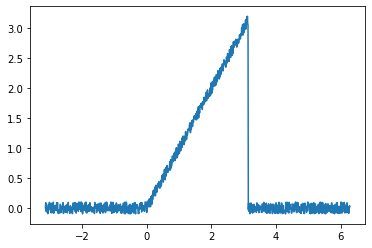

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function
of frequency, a plot of the Fourier power spectrum as a function of frequency, and also
a plot of the time spectrum using the Fourier components as compared to the original time spectrum.

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory?  What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

(-1.2, 1.2)

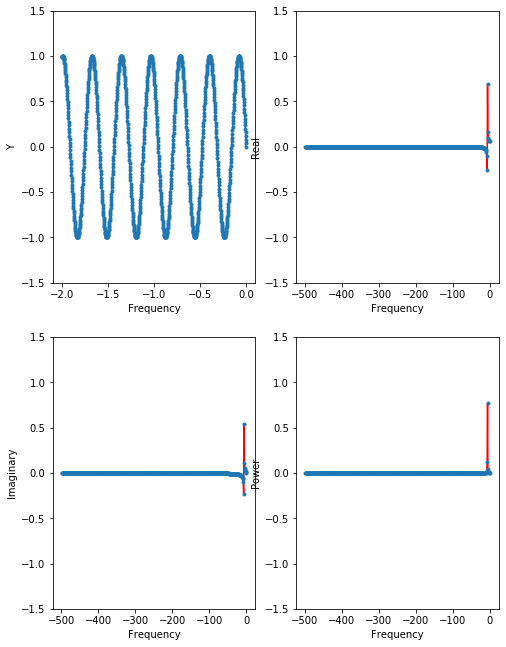

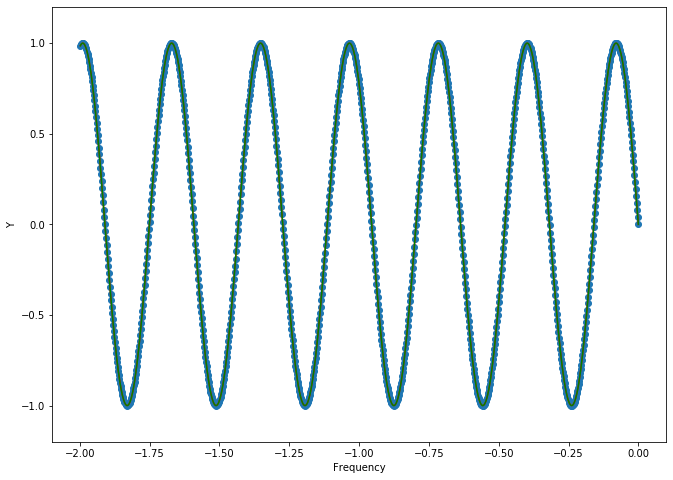

In [2]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random

# Choose the signal frequency (0.2Hz) and the number of cycles to sample over (2) and the number of samples (50)

f_s = -np.pi
N_cycles = 2*np.pi
N_samples = 1000

# Calculate the timespan
period = 1/f_s
T =  N_cycles*period

# Set the number of terms in the Fourier series (initially, equal to the number of samples, which is bad!)

N_terms = int(N_samples/2)

random.seed(1)

# Calculate the spacing (in time) between data points
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t = np.zeros(N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)


# Create the data set.  Add a little bit of random noise into the signal.

for i in range(N_samples):
    t[i]=i*dt
    y[i]=(1.0+0.00000002*random.uniform(-1,1))*np.sin(2.0*np.pi*t[i]*f_s)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
    
# print (y,f,t)


from timeit import default_timer as timer

start = timer()

# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
# print ("Brash: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
# print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
# print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))
    
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
# print ("Python: ",(end-start))
# print("Ratio = ",btime/(end-start))

# for i in range(N_terms):
# #     print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])
    
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-1.5,1.5)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)

fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(11,8))

axs3.plot(t,y,'o')
axs3.plot(time,yhigh,'r-')
axs3.plot(time,ylow,'g-')
axs3.set_ylabel('Y')
axs3.set_xlabel('Frequency')
axs3.set_ylim(-1.2,1.2)

## Question 2 - Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream.  The frog should continue jumping until that moment when it gets to the other side of the stream.  The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?  

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [4]:
n = 30

In [5]:
random.seed(1)

In [6]:
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []

In [7]:
for npad in range(1,n+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        #evalr.append(eval[npad-1]/npad)
        evalr.append(eval[npad-1])
    #print("Theory: ",npad,eval[npad-1])
    
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalr3.append(sum2)
    
    #print (npad,sum2)
    
    end = npad
    for j in range(n_trys):
        while start < npad:
            jump = int(random.uniform((start - end + 1),(end-start+1)))
            #print ("Jump = ",jump)
            start = start + jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1
        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 1 is 1.992900
Expectation value for n = 2 is 2.996100
Expectation value for n = 3 is 3.897800
Expectation value for n = 4 is 4.662000
Expectation value for n = 5 is 5.277700
Expectation value for n = 6 is 5.846800
Expectation value for n = 7 is 6.277300
Expectation value for n = 8 is 6.592600
Expectation value for n = 9 is 7.093800
Expectation value for n = 10 is 7.442400
Expectation value for n = 11 is 7.586300
Expectation value for n = 12 is 7.884400
Expectation value for n = 13 is 8.114200
Expectation value for n = 14 is 8.347700
Expectation value for n = 15 is 8.697600
Expectation value for n = 16 is 8.789300
Expectation value for n = 17 is 9.192600
Expectation value for n = 18 is 9.171500
Expectation value for n = 19 is 9.428800
Expectation value for n = 20 is 9.608200
Expectation value for n = 21 is 9.685700
Expectation value for n = 22 is 9.920000
Expectation value for n = 23 is 10.018700
Expectation value for n = 24 is 10.146700
Expectation value for n

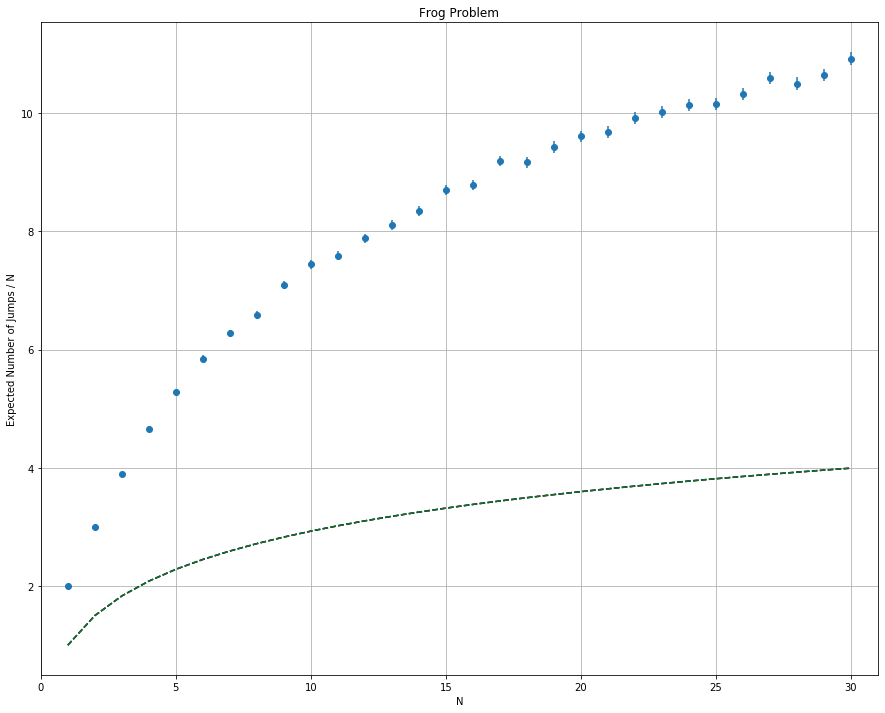

In [8]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
ax1.plot(x,evalr2,'b--')
ax1.plot(x,evalr3,'g--')

In [9]:
# the result is surprising because you'd think it would take the frog longer to reach the other side. 

## Question 3 - Random Walk

Begin with the example Jupyter Notebook called drunken_sailor.ipynb  

In the first example, we considered random walk in one dimension.  For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.  

In this question, we would like to consider a different underlying distribution for the step size.  Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1.  Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size?  Do your results agree with the predictions of the central limit theorem?

In [10]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  # random walk using a normal distribution for step sizes
    r = stats.poisson.rvs(1, size=nsteps)  # normal distribution mean=0 variance=1
    # r is a vector values randomly generated with a normal distribution
    return sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)

TypeError: 'float' object is not callable

In [ ]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line